<div style="text-align: right">Name : Akshata Sanjay Jadhav</div>
<div style="text-align: right">Python version : 3.9</div>
<div style="text-align: right">Libraries used : wordcloud, nltk, nrclex, re, pandas numpy, matplotlib</div>

Mid Term Work

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshatajadhav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshatajadhav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
from nltk.tokenize import word_tokenize

### Parsing Data

Categorizing the titles according to their Genre of Shakespeares works

In [5]:
genre = {"POEM":["THE SONNETS", "A LOVER'S COMPLAINT"],
         "COMEDY":["ALLS WELL THAT ENDS WELL","AS YOU LIKE IT","THE COMEDY OF ERRORS", "CYMBELINE", "LOVE'S LABOUR'S LOST",
                   "MEASURE FOR MEASURE", "THE MERCHANT OF VENICE", "THE MERRY WIVES OF WINDSOR", "A MIDSUMMER NIGHT'S DREAM",
                   "MUCH ADO ABOUT NOTHING", "THE TAMING OF THE SHREW", "THE TEMPEST", "TWELFTH NIGHT; OR, WHAT YOU WILL",
                  "THE TWO GENTLEMEN OF VERONA", "THE WINTER'S TALE", ],
        "HISTORY":["THE FIRST PART OF KING HENRY THE FOURTH", "SECOND PART OF KING HENRY IV", "THE LIFE OF KING HENRY THE FIFTH",
                  "THE FIRST PART OF HENRY THE SIXTH", "THE SECOND PART OF KING HENRY THE SIXTH", "THE THIRD PART OF KING HENRY THE SIXTH",
                  "KING HENRY THE EIGHTH", "KING JOHN", "KING RICHARD THE SECOND", "KING RICHARD III", "THE HISTORY OF TROILUS AND CRESSIDA",
                  ],
        "TRAGEDY":["THE TRAGEDY OF ANTONY AND CLEOPATRA", "THE TRAGEDY OF CORIOLANUS", "THE TRAGEDY OF HAMLET, PRINCE OF DENMARK",
                  "THE TRAGEDY OF JULIUS CAESAR", "THE TRAGEDY OF KING LEAR", "THE TRAGEDY OF MACBETH", "THE TRAGEDY OF OTHELLO, MOOR OF VENICE",
                  "THE TRAGEDY OF ROMEO AND JULIET", "THE LIFE OF TIMON OF ATHENS", "THE TRAGEDY OF TITUS ANDRONICUS", ]}
all_titles=[]
for titles in genre.values():
    all_titles.extend(titles)

def get_genre(title):
    for key,values in genre.items():
        if title in values:
            return key
    return "UNKNOWN"    


### Reading Data File

In [6]:
shakespeare = ""
with open('t8.shakespeare.txt') as file:
    shakespeare = file.read()

### Cleaning the data

In [7]:
clean_data = re.sub("<<[^>]*>>","", shakespeare)

### Categorizing the data according to genre, title, year, content

In [8]:
rexp=re.compile("(\d*)\n*([A-Z ,';]*)\n*by William Shakespeare(.*?(?=THE END))THE END", re.DOTALL)

In [9]:
chapters = re.findall(rexp, clean_data)

In [10]:
for year, title, content in chapters:
    which_genre = get_genre(title)
    print("Genre:",which_genre, " Year:",year, " Title:",title)

Genre: POEM  Year: 1609  Title: THE SONNETS
Genre: COMEDY  Year: 1603  Title: ALLS WELL THAT ENDS WELL
Genre: TRAGEDY  Year: 1607  Title: THE TRAGEDY OF ANTONY AND CLEOPATRA
Genre: COMEDY  Year: 1601  Title: AS YOU LIKE IT
Genre: COMEDY  Year: 1593  Title: THE COMEDY OF ERRORS
Genre: TRAGEDY  Year: 1608  Title: THE TRAGEDY OF CORIOLANUS
Genre: COMEDY  Year: 1609  Title: CYMBELINE
Genre: TRAGEDY  Year: 1604  Title: THE TRAGEDY OF HAMLET, PRINCE OF DENMARK
Genre: HISTORY  Year: 1598  Title: THE FIRST PART OF KING HENRY THE FOURTH
Genre: HISTORY  Year: 1598  Title: SECOND PART OF KING HENRY IV
Genre: HISTORY  Year: 1599  Title: THE LIFE OF KING HENRY THE FIFTH
Genre: HISTORY  Year: 1592  Title: THE FIRST PART OF HENRY THE SIXTH
Genre: HISTORY  Year: 1591  Title: THE SECOND PART OF KING HENRY THE SIXTH
Genre: HISTORY  Year: 1591  Title: THE THIRD PART OF KING HENRY THE SIXTH
Genre: HISTORY  Year: 1611  Title: KING HENRY THE EIGHTH
Genre: HISTORY  Year: 1597  Title: KING JOHN
Genre: TRAGEDY

### Creating the Data Frame using Pandas

In [11]:
sp = pd.DataFrame(columns = ['Chapter_Count','Genre_Chapter_Count','Genre','Year', 'Title', 'Lines', 'Word_Count'])

In [12]:
genre_chapter_count = {key:0 for key in genre.keys()}

In [13]:
chapter_count = 0
sp_content = ""

### Parsing and adding content in the df

In [14]:
for year, title, content in chapters:
    which_genre = get_genre(title)
    genre_chapter_count[which_genre] += 1
    chapter_count += 1
    clean_content = [c for c in map(str.strip, content.split("\n")) if not c.isdigit() and c!=""]
    if which_genre != "POEM":
        lines = nltk.sent_tokenize(" ".join(clean_content))
    else:
        lines = clean_content
    lc = len(lines)
    sp = sp.append(pd.DataFrame({"Chapter_Count": [chapter_count]*lc
                                 ,"Genre_Chapter_Count":[genre_chapter_count[which_genre]]*lc
                                 ,"Genre":[which_genre]*lc
                                 ,"Year":[year]*lc
                                 ,"Title":[title]*lc
                                 ,"Lines":lines}), ignore_index = True)
    

In [15]:
sp

,Chapter_Count,Genre_Chapter_Count,Genre,Year,Title,Lines,Word_Count
0,1,1,POEM,1609,THE SONNETS,"From fairest creatures we desire increase,",NaN
1,1,1,POEM,1609,THE SONNETS,"That thereby beauty's rose might never die,",NaN
2,1,1,POEM,1609,THE SONNETS,"But as the riper should by time decease,",NaN
3,1,1,POEM,1609,THE SONNETS,His tender heir might bear his memory:,NaN
4,1,1,POEM,1609,THE SONNETS,"But thou contracted to thine own bright eyes,",NaN
...,...,...,...,...,...,...,...
97455,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, that forced thunder from his heart did fly,",NaN
97456,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, that sad breath his spongy lungs bestowed,",NaN
97457,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, all that borrowed motion, seeming owed,",NaN
97458,38,2,POEM,1609,A LOVER'S COMPLAINT,"Would yet again betray the fore-betrayed,",NaN


### Lemmatizing the sentences

In [16]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()


In [17]:
def lemmatize(sentence):
  word_list = nltk.word_tokenize(sentence.lower())
  return list(lemmatizer.lemmatize(w) for w in word_list)

In [18]:
sp["Lemmatized"] = sp["Lines"].apply(lambda sentence: lemmatize(sentence))

### SECTION FOR QUESTION 1

In [19]:
sp['Word_Count'] = sp.apply(lambda row : len(row['Lines'].split(" ")), axis = 1)

In [20]:
sp

,Chapter_Count,Genre_Chapter_Count,Genre,Year,Title,Lines,Word_Count,Lemmatized
0,1,1,POEM,1609,THE SONNETS,"From fairest creatures we desire increase,",6,"[from, fairest, creature, we, desire, increase..."
1,1,1,POEM,1609,THE SONNETS,"That thereby beauty's rose might never die,",7,"[that, thereby, beauty, 's, rose, might, never..."
2,1,1,POEM,1609,THE SONNETS,"But as the riper should by time decease,",8,"[but, a, the, riper, should, by, time, decease..."
3,1,1,POEM,1609,THE SONNETS,His tender heir might bear his memory:,7,"[his, tender, heir, might, bear, his, memory, :]"
4,1,1,POEM,1609,THE SONNETS,"But thou contracted to thine own bright eyes,",8,"[but, thou, contracted, to, thine, own, bright..."
...,...,...,...,...,...,...,...,...
97455,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, that forced thunder from his heart did fly,",9,"[o, ,, that, forced, thunder, from, his, heart..."
97456,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, that sad breath his spongy lungs bestowed,",8,"[o, ,, that, sad, breath, his, spongy, lung, b..."
97457,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, all that borrowed motion, seeming owed,",7,"[o, ,, all, that, borrowed, motion, ,, seeming..."
97458,38,2,POEM,1609,A LOVER'S COMPLAINT,"Would yet again betray the fore-betrayed,",6,"[would, yet, again, betray, the, fore-betrayed..."


### Q1.1 Do a word Cloud of all of Shakespeare's works

In [21]:
stopwords = set(STOPWORDS)
with open("stopwords.txt") as sw:
    stopwords = stopwords.union(set(map(str.strip, sw.readlines())))

In [22]:
text = " ".join(set().union(*sp.Lemmatized))

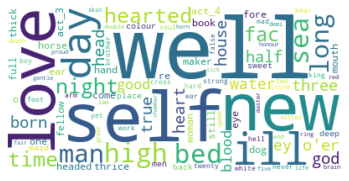

In [23]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Q1.2 What's the average number of words per sentence?

In [24]:
avg_word_in_sentence = sp.Word_Count.mean()
avg_word_in_sentence

9.084301251795608

### Q1.3 What's the average number of words per sentence per type of publication?

In [25]:
avg_word_in_sentence_per_genre = sp.groupby(['Genre'],as_index=False).Word_Count.mean().sort_values("Word_Count", ascending=False,ignore_index=True)
avg_word_in_sentence_per_genre

,Genre,Word_Count
0,HISTORY,10.371299
1,COMEDY,9.031530
2,POEM,8.108293
3,TRAGEDY,8.075317


### SECTION FOR QUESTION 2

### Possible question pattern that can be present

In [26]:
question_pattern = ( "what", "who", "why","would", "how", "when")
def is_question(data):
  return set(data).intersection(question_pattern)!=set() and "?" in data

In [27]:
sp2 = sp
sp2

,Chapter_Count,Genre_Chapter_Count,Genre,Year,Title,Lines,Word_Count,Lemmatized
0,1,1,POEM,1609,THE SONNETS,"From fairest creatures we desire increase,",6,"[from, fairest, creature, we, desire, increase..."
1,1,1,POEM,1609,THE SONNETS,"That thereby beauty's rose might never die,",7,"[that, thereby, beauty, 's, rose, might, never..."
2,1,1,POEM,1609,THE SONNETS,"But as the riper should by time decease,",8,"[but, a, the, riper, should, by, time, decease..."
3,1,1,POEM,1609,THE SONNETS,His tender heir might bear his memory:,7,"[his, tender, heir, might, bear, his, memory, :]"
4,1,1,POEM,1609,THE SONNETS,"But thou contracted to thine own bright eyes,",8,"[but, thou, contracted, to, thine, own, bright..."
...,...,...,...,...,...,...,...,...
97455,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, that forced thunder from his heart did fly,",9,"[o, ,, that, forced, thunder, from, his, heart..."
97456,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, that sad breath his spongy lungs bestowed,",8,"[o, ,, that, sad, breath, his, spongy, lung, b..."
97457,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, all that borrowed motion, seeming owed,",7,"[o, ,, all, that, borrowed, motion, ,, seeming..."
97458,38,2,POEM,1609,A LOVER'S COMPLAINT,"Would yet again betray the fore-betrayed,",6,"[would, yet, again, betray, the, fore-betrayed..."


In [28]:
sp2["Question"] = sp2["Lemmatized"].apply(lambda data: is_question(data))

In [29]:
len(sp2.loc[sp['Question'] == True])

4905

### Q2.1 What's the probability that Shakespeare asks a question?

In [30]:
prob = pd.DataFrame(sp2.Question.value_counts(normalize=True).reset_index())
prob.rename(columns={'index':'Question', 'Question':'Probability'}, inplace=True)
prob

,Question,Probability
0,False,0.949672
1,True,0.050328


In [31]:
prob.loc[prob["Question"]==True]["Probability"].item()

0.050328339831725834

### Q2.2 What's the distribution of the number of questions for all his works?

The possible distribution that can be used is Binomial Distribution as the distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p).

In [32]:
number_of_question_per_title = sp2.loc[sp2["Question"]==True].groupby(['Title'],as_index=False).Question.count()


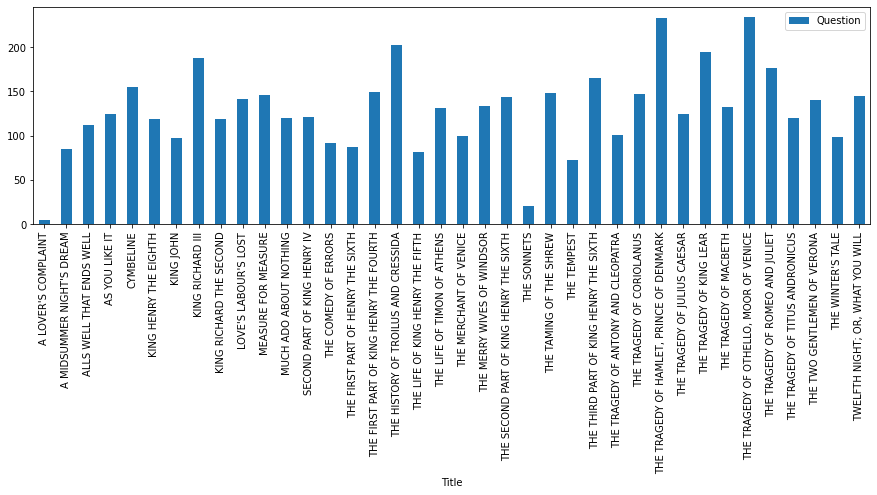

In [33]:
number_of_question_per_title.plot(x ='Title', y='Question', kind = 'bar', figsize=(15,4) )
plt.show()

In [34]:
def csv_to_dataframe(series,header=[]):
  csv_data = series.to_csv( sep='#', header=False)
  df = pd.DataFrame()
  for data in csv_data.split("\n"):
    df=df.append({i:j for i,j in zip(header, data.split("#"))}, ignore_index=True)
  return df.dropna()

In [35]:
prob_title = sp2.groupby(['Title']).Question.value_counts(normalize=True)
df_prob_title = csv_to_dataframe(prob_title, header=["Title", "Question", "Probability"])
df_prob_title

,Title,Question,Probability
0,A LOVER'S COMPLAINT,False,0.9848024316109423
1,A LOVER'S COMPLAINT,True,0.015197568389057751
2,A MIDSUMMER NIGHT'S DREAM,False,0.9491626794258373
3,A MIDSUMMER NIGHT'S DREAM,True,0.05083732057416268
4,ALLS WELL THAT ENDS WELL,False,0.9579737335834897
...,...,...,...
71,THE TWO GENTLEMEN OF VERONA,True,0.06266786034019696
72,THE WINTER'S TALE,False,0.9596247960848288
73,THE WINTER'S TALE,True,0.04037520391517129
74,"TWELFTH NIGHT; OR, WHAT YOU WILL",False,0.9435138293728087


### Q2.3 What's the distribution of the number of questions based on genre (comedies, tragedies, histories, sonnets)?

In [36]:
number_of_question_per_genre = sp2.loc[sp2["Question"]==True].groupby(['Genre'],as_index=False).Question.count()
number_of_question_per_genre

,Genre,Question
0,COMEDY,1815
1,HISTORY,1472
2,POEM,25
3,TRAGEDY,1593


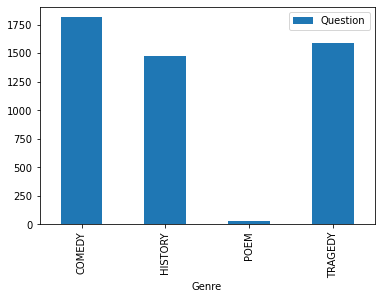

In [37]:
number_of_question_per_genre.plot(x ='Genre', y='Question', kind = 'bar')
plt.show()

In [38]:
prob_genre = sp2.groupby(['Genre']).Question.value_counts(normalize=True)
df_prob_genre = csv_to_dataframe(prob_genre, header=["Title", "Question", "Probability"])
df_prob_genre

,Title,Question,Probability
0,COMEDY,False,0.9501510574018127
1,COMEDY,True,0.04984894259818731
2,HISTORY,False,0.9467245747376041
3,HISTORY,True,0.053275425262395947
4,POEM,False,0.9899355877616747
5,POEM,True,0.010064412238325281
6,TRAGEDY,False,0.9485065942591155
7,TRAGEDY,True,0.05149340574088441


### SECTION FOR QUESTION 3

### Sentimental Analysis

Using Library nrclex as it allows more than 6 sentiments

In [39]:
from nrclex import NRCLex

In [40]:
def sentiment_analysis (text):
    data = {}
    for key, value in NRCLex(text).affect_frequencies.items():
        k = key
        if k == "anticip":
            k = "Anticipation"
        data[k.title()] = value
    return data

In [41]:
def apply_and_concat(dataframe, field, func):
    return pd.concat((
        dataframe,
        dataframe[field].apply(
            lambda cell: pd.Series(func(" ".join(cell))))), axis=1)

### Q3.1 Do a sentiment analysis of Shakespeare's sentences

In [42]:
sp3 = sp

In [43]:
sp3 = apply_and_concat(sp3, "Lemmatized", sentiment_analysis)

In [44]:
sp3

,Chapter_Count,Genre_Chapter_Count,Genre,Year,Title,Lines,Word_Count,Lemmatized,Question,Fear,Anger,Anticipation,Trust,Surprise,Positive,Negative,Sadness,Disgust,Joy
0,1,1,POEM,1609,THE SONNETS,"From fairest creatures we desire increase,",6,"[from, fairest, creature, we, desire, increase...",False,0.25,0.000000,0.0,0.0,0.0,0.25,0.250000,0.0,0.250000,0.0
1,1,1,POEM,1609,THE SONNETS,"That thereby beauty's rose might never die,",7,"[that, thereby, beauty, 's, rose, might, never...",False,0.20,0.000000,0.0,0.0,0.0,0.20,0.200000,0.2,0.000000,0.2
2,1,1,POEM,1609,THE SONNETS,"But as the riper should by time decease,",8,"[but, a, the, riper, should, by, time, decease...",False,0.00,0.000000,1.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0
3,1,1,POEM,1609,THE SONNETS,His tender heir might bear his memory:,7,"[his, tender, heir, might, bear, his, memory, :]",False,0.20,0.200000,0.0,0.2,0.0,0.20,0.000000,0.0,0.000000,0.2
4,1,1,POEM,1609,THE SONNETS,"But thou contracted to thine own bright eyes,",8,"[but, thou, contracted, to, thine, own, bright...",False,0.00,0.000000,0.0,0.0,0.0,0.00,1.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97455,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, that forced thunder from his heart did fly,",9,"[o, ,, that, forced, thunder, from, his, heart...",False,0.50,0.000000,0.0,0.0,0.0,0.00,0.500000,0.0,0.000000,0.0
97456,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, that sad breath his spongy lungs bestowed,",8,"[o, ,, that, sad, breath, his, spongy, lung, b...",False,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0
97457,38,2,POEM,1609,A LOVER'S COMPLAINT,"O, all that borrowed motion, seeming owed,",7,"[o, ,, all, that, borrowed, motion, ,, seeming...",False,0.00,0.000000,1.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0
97458,38,2,POEM,1609,A LOVER'S COMPLAINT,"Would yet again betray the fore-betrayed,",6,"[would, yet, again, betray, the, fore-betrayed...",False,0.00,0.200000,0.0,0.0,0.2,0.00,0.200000,0.2,0.200000,0.0


### Q3.2 Find the sentiment distribution per genre (comedies, tragedies, histories, sonnets).

In [45]:
sentiment_distribution_per_genre = sp3.groupby("Genre").agg({'Fear': 'mean', 
                         'Anger': 'mean', 
                         'Anticipation': 'mean', 
                         'Trust': 'mean', 
                         'Surprise': 'mean', 
                         'Positive': 'mean', 
                         'Negative': 'mean', 
                         'Sadness': 'mean', 
                         'Disgust': 'mean', 
                         'Joy': 'mean'})
sentiment_distribution_per_genre

,Fear,Anger,Anticipation,Trust,Surprise,Positive,Negative,Sadness,Disgust,Joy
Genre,,,,,,,,,,
COMEDY,0.030788,0.024242,0.044387,0.082621,0.022464,0.162913,0.074996,0.029324,0.024542,0.042147
HISTORY,0.039689,0.035391,0.040396,0.085427,0.020088,0.189370,0.095121,0.034805,0.033825,0.036855
POEM,0.052672,0.038984,0.071289,0.080423,0.024770,0.206935,0.122636,0.061183,0.030045,0.085219
TRAGEDY,0.037131,0.026239,0.040755,0.083590,0.018929,0.128157,0.082394,0.030665,0.026950,0.033206


In [46]:
sentiment_distribution_per_genre = sp3.groupby("Genre").agg({'Fear': 'mean', 
                         'Anger': 'mean', 
                         'Anticipation': 'mean', 
                         'Trust': 'mean', 
                         'Surprise': 'mean', 
                         'Positive': 'mean', 
                         'Negative': 'mean', 
                         'Sadness': 'mean', 
                         'Disgust': 'mean', 
                         'Joy': 'mean'})
sentiment_distribution_per_genre

,Fear,Anger,Anticipation,Trust,Surprise,Positive,Negative,Sadness,Disgust,Joy
Genre,,,,,,,,,,
COMEDY,0.030788,0.024242,0.044387,0.082621,0.022464,0.162913,0.074996,0.029324,0.024542,0.042147
HISTORY,0.039689,0.035391,0.040396,0.085427,0.020088,0.189370,0.095121,0.034805,0.033825,0.036855
POEM,0.052672,0.038984,0.071289,0.080423,0.024770,0.206935,0.122636,0.061183,0.030045,0.085219
TRAGEDY,0.037131,0.026239,0.040755,0.083590,0.018929,0.128157,0.082394,0.030665,0.026950,0.033206


<AxesSubplot:xlabel='Genre'>

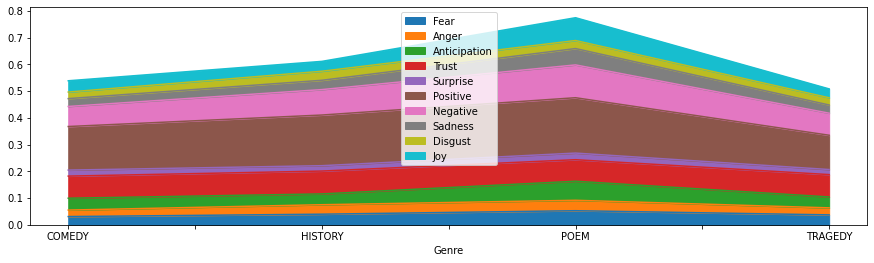

In [47]:
sentiment_distribution_per_genre.plot( figsize=(15,4),kind='area')

### SECTION FOR QUESTION 4

### Time Series Analysis

In [48]:
def plot_sentiment_graph(genre, df_sentiment, figsize=(10,6)):
  fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=figsize)
  for i, ax in enumerate(axes.flatten()):
      data = df_sentiment[df_sentiment.columns[i]]
      ax.plot(data, color='red', linewidth=1)
      # Decorations
      ax.set_title(df_sentiment.columns[i])
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)
  plt.suptitle(genre)
  plt.tight_layout();

In [49]:
year_sentiment = sp3.groupby("Year").agg({'Fear': 'mean', 
                         'Anger': 'mean', 
                         'Anticipation': 'mean', 
                         'Trust': 'mean', 
                         'Surprise': 'mean', 
                         'Positive': 'mean', 
                         'Negative': 'mean', 
                         'Sadness': 'mean', 
                         'Disgust': 'mean', 
                         'Joy': 'mean'})


In [50]:
type(year_sentiment)

pandas.core.frame.DataFrame

### Visualization of Time Series

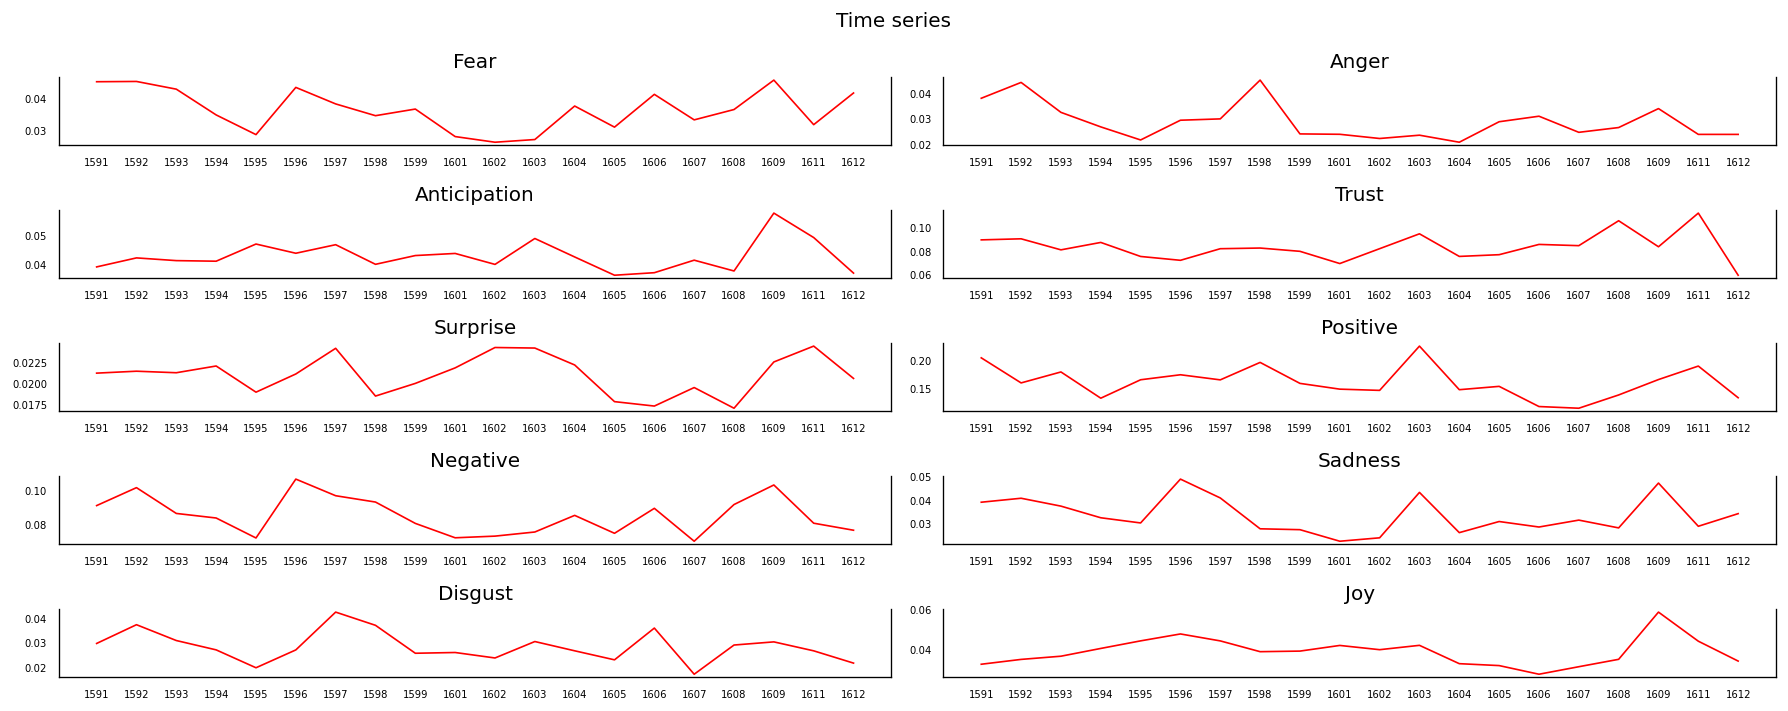

In [51]:
plot_sentiment_graph("Time series",year_sentiment,figsize=(15,6))

In [52]:
gp_genre_year_sentiment = sp3.groupby(["Genre"])

In [53]:
def genre_wise_time_graph(genre):
  sentiment = gp_genre_year_sentiment.get_group(genre)
  year_sentiment = sentiment.groupby(["Year"]).agg({'Fear': 'mean', 
                         'Anger': 'mean', 
                         'Anticipation': 'mean', 
                         'Trust': 'mean', 
                         'Surprise': 'mean', 
                         'Positive': 'mean', 
                         'Negative': 'mean', 
                         'Sadness': 'mean', 
                         'Disgust': 'mean', 
                         'Joy': 'mean'})
  return year_sentiment

In [54]:
def genre_wise_graph(genre):
  sentiment = gp_genre_year_sentiment.get_group(genre)
  return sentiment.sort_values("Year")

In [55]:
sentiments  = ["Fear", "Anger", "Anticipation", "Trust", "Surprise", "Sadness", "Disgust", "Joy"]

### Q4.1 Do a time series analysis for each genre (i.e. one for drama, one for comedy, etc.) of the 6 main sentiments.

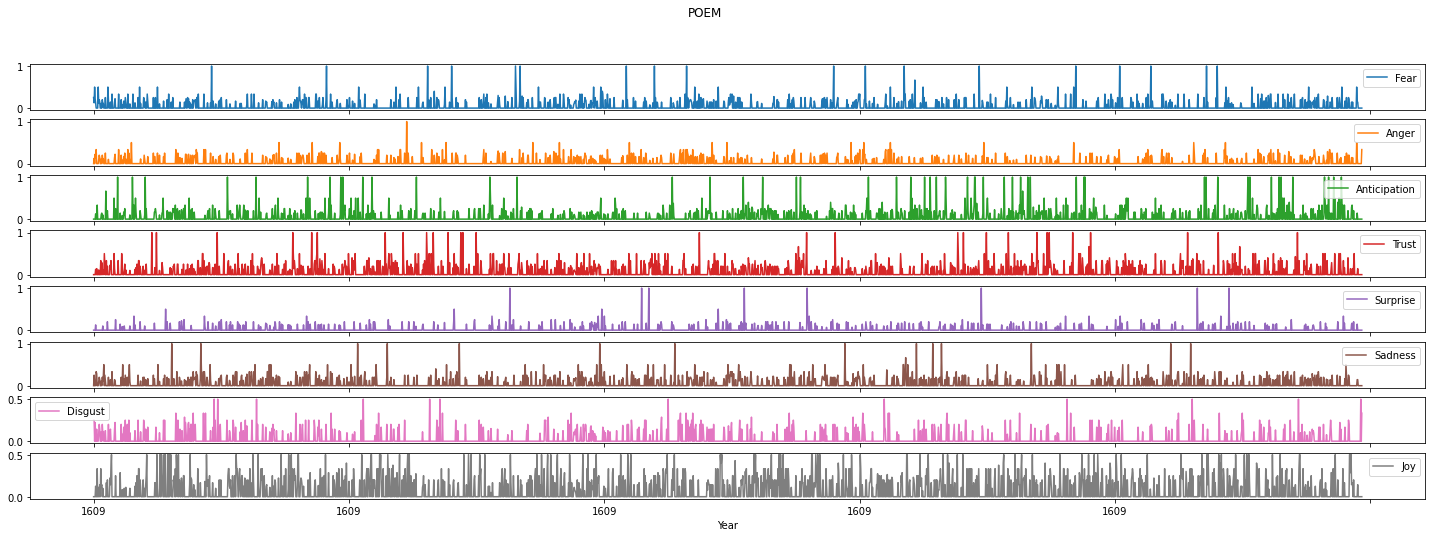

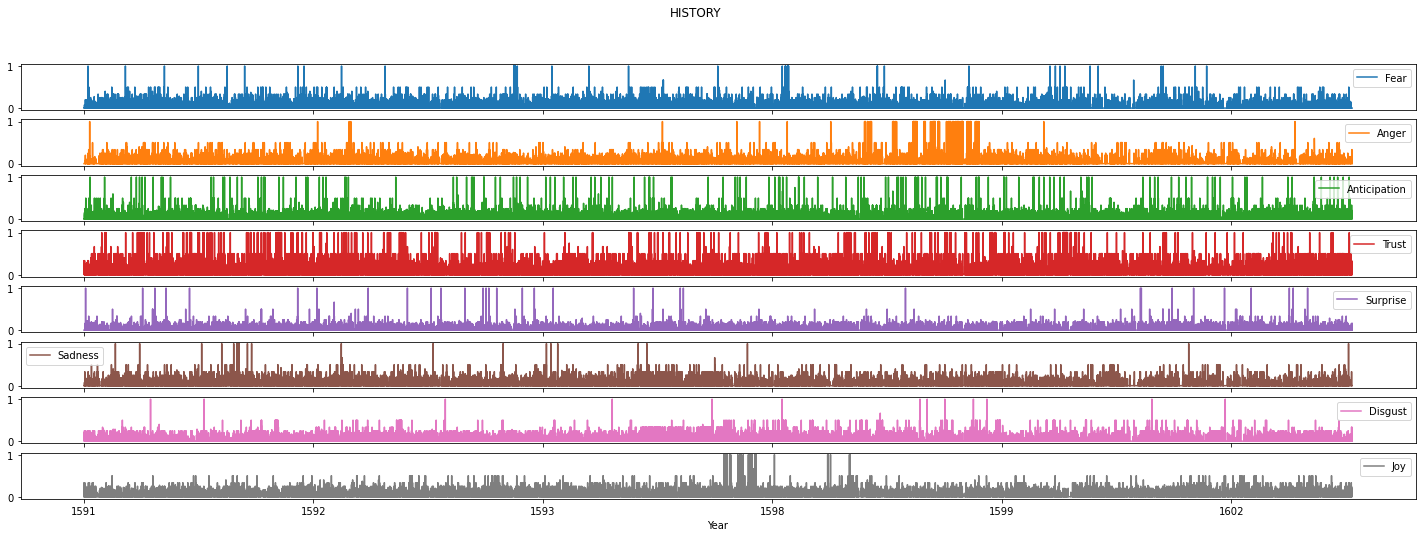

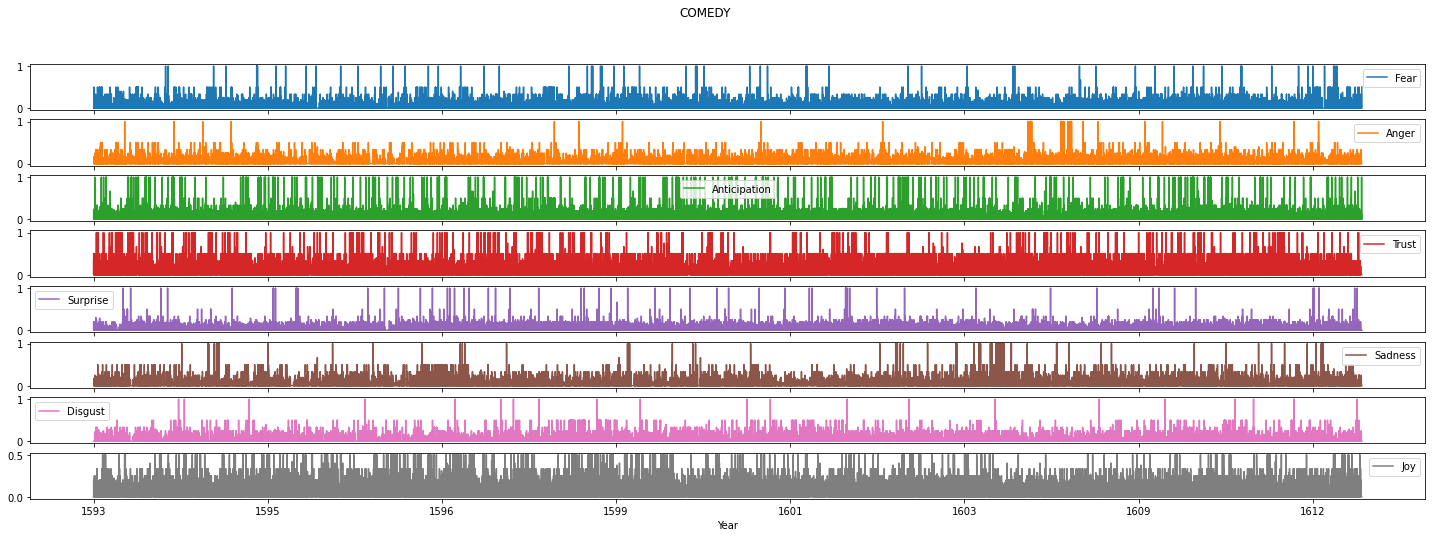

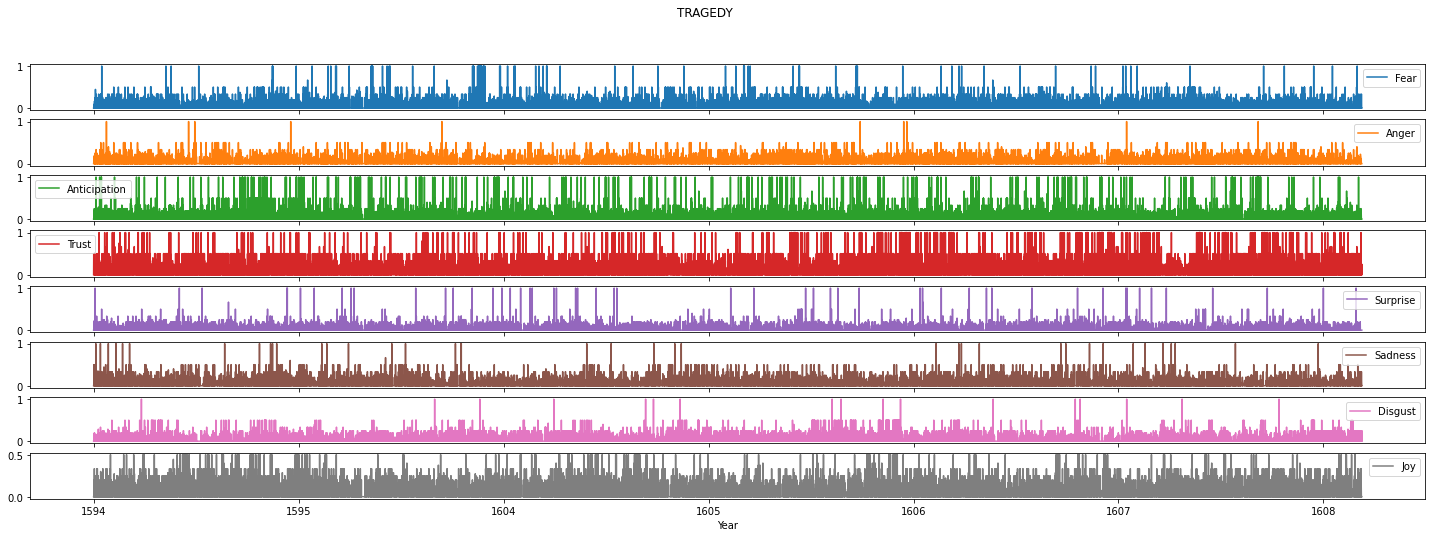

In [56]:
for genre in ["POEM", "HISTORY", "COMEDY", "TRAGEDY"]:
  temp_df = genre_wise_graph(genre)
  temp_df.plot(y=sentiments, subplots=True,x="Year",figsize=(25,8),title=genre)


### Q4.2 Smooth out the time series with a method of your choice, to get rid of noise

For smoothing the data, I have used Mean aggregation

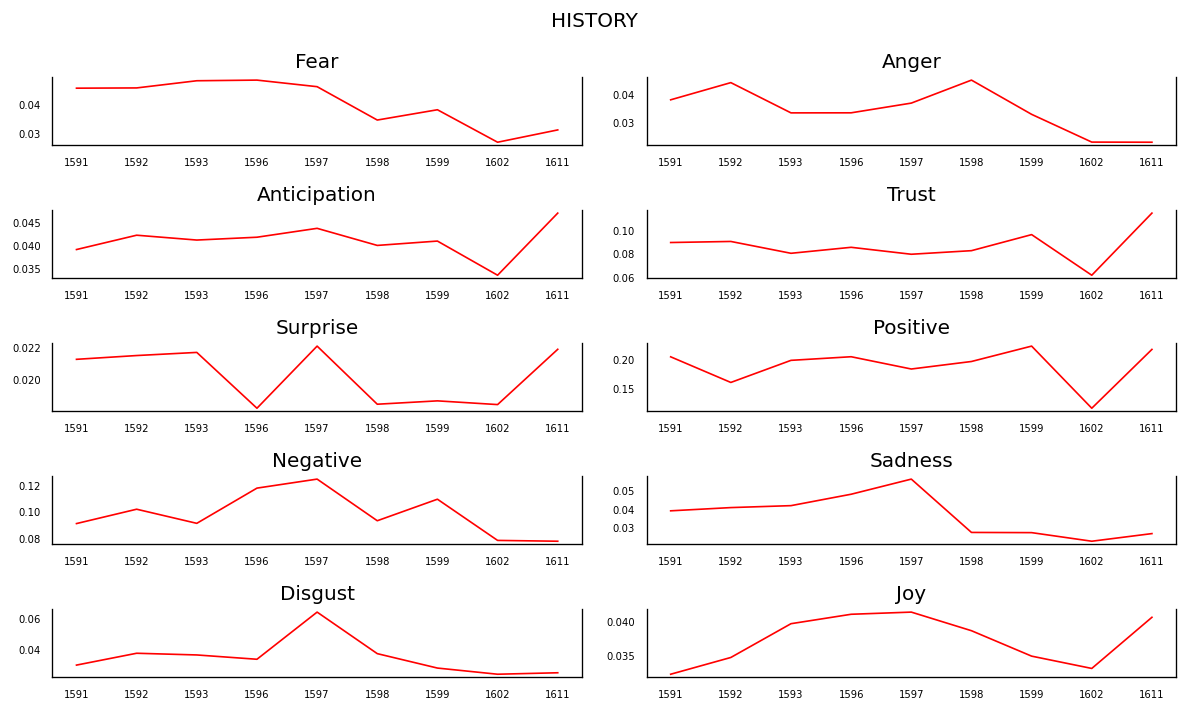

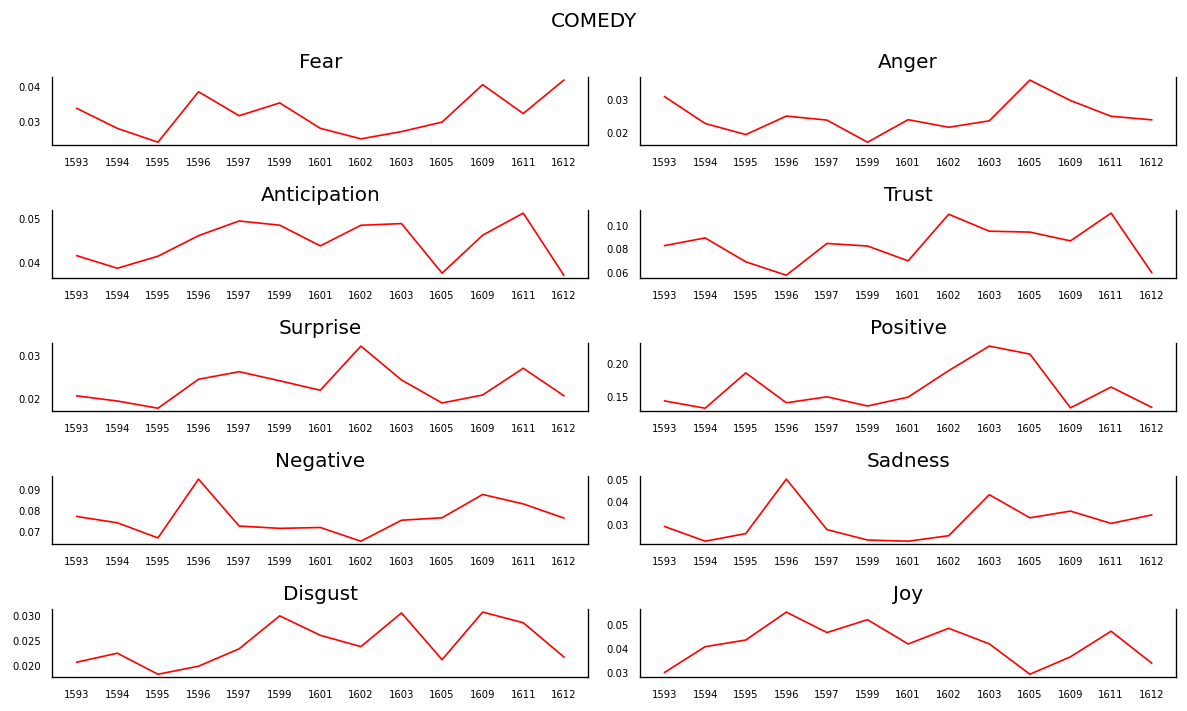

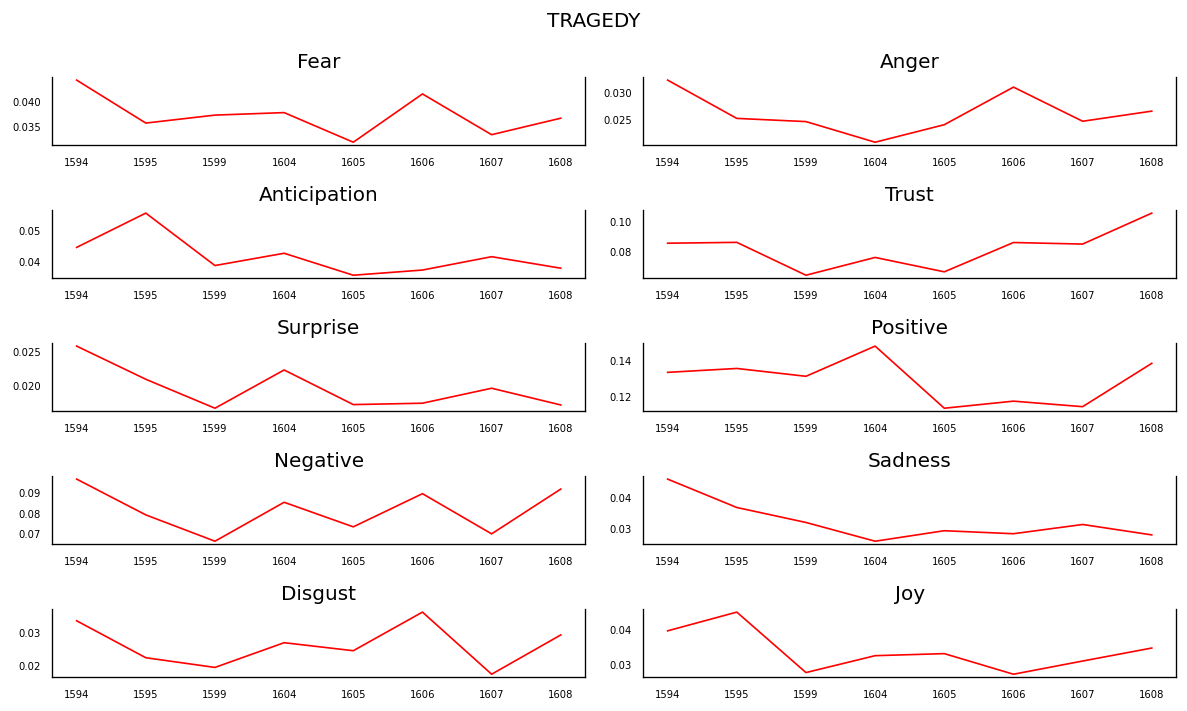

In [57]:
for genre in ["HISTORY", "COMEDY", "TRAGEDY"]:
  temp_df = genre_wise_time_graph(genre)
  plot_sentiment_graph(genre,temp_df)

### Q4.3 What can you conclude about sentiment in Shakespeare's works? What's your favorite work, and why?

According to the Sentimental Analysis, Positive sentiment is the highest among all the publications followed by Joy.

My favourite work of Shakespeare is Macbeth as it is based majorly on physical and psychological effects of political ambition that fascinates me.